<font size='6'><b>Forced Vibration</b></font>

Table of Contents
<div id="toc"></div>

In [5]:
%%html
<iframe 
width="560" height="315" src="https://www.youtube.com/embed/W4s2UwKm7dc" frameborder="0" allowfullscreen>
</iframe>

# 1. Sinusoidal Signals


$$ 
x(t) = x_m \cos(\omega t + \theta)$$

- amplitude: $x_m$

- period: T sec

- frequency (Hz): $f = \frac{1}{T}$

- frequency (rad/sec): $\omega = 2\pi f$

- phase angle: $\theta$

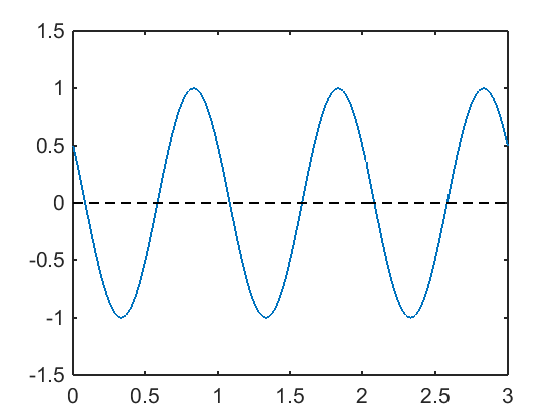

In [6]:
f = 1;
w = 2*pi*f;
T = 1/f;
xm = 1;
theta = pi/3;

t = 0:0.01:3*T;

x = xm*cos(w*t + theta);
plot(t,x,t,zeros(size(t)),'k--'), ylim([-1.5 1.5])

## 1.1. Two sinusoidal signals in complex plane

<table style="border-style: hidden; border-collapse: collapse;" width = "60%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 30% style="border-style: hidden; border-collapse: collapse;">
<img src="./image_files/two_sinusoidals.png" width = 250>
        </td>
        <td width = 30%>
$$ 
\begin{align*}
z_1 &= A e^{j \omega t} \\
z_2 &= A e^{j\left(\omega t + \phi \right)}
\end{align*}$$

        </td>
    </tr>
</table>

- Both $z_1$ and $z_2$ ar rotating with angular velocity $\omega$, but angle $\phi$ between $z_1$ and $z_2$ is remaining constant.

## 1.2. Sinusoidal input and output to differential system


<img src="./image_files/Diff_system.png" width = 400>

- input

$$ x = x_m e^{j\omega t}$$

- output

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 40% style="border-style: hidden; border-collapse: collapse;">
$$ y = \frac{dx}{dt} = j\omega \cdot x_m e^{j\omega t} = j\omega x = \omega e^{j\frac{\pi}{2}}x$$
        </td>
        <td width = 40%>
<img src="./image_files/Diff_input_output.png" width = 300>
        </td>
    </tr>
</table>


|||note|
|---|----|----|
|1|sinusoidal $\longrightarrow$ sinusoidal|  |
|2|$\omega \longrightarrow \omega$|input and output rotate with the same $\omega$|
|3|$\phi = \frac{\pi}{2}$| output leads input by $\frac{\pi}{2}$|
|4|$A = \left\lvert \frac{y}{x} \right\rvert = \omega$| amplitude gain is a function of $\omega$|


In [7]:
f = 1;
w = 2*pi*f;
T = 1/f;
xm = 1;
theta = pi/3;

t = 0:0.01:3*T;

x1 = xm*exp(1j*w*t);
x2 = xm*exp(1j*(w*t + theta));

plot(t,real(x1),t,real(x2),t,zeros(size(t)),'k--'), ylim([-1.5 1.5])
legend('input','output')

## 1.3. Sinusoidal input to linear system

<img src="./image_files/linearsystem_input_output.png" width = 500>


# 2. Forced Oscillation

- So far, we have not taken an external force into account


- large input $\rightarrow$ large output ?
    - not always true. why ?
    - non-linear system ? 

- Swing example
    - frequency
    - phase

- sinusoidal input and sinusoidal output ?
    - difficult to explain


## 2.1. Mass + spring + damper system

<img src="./image_files/MassSpringDamper_DirectForce_Horiz.png" width = 500>

<br><br>

- Equations of motion

$$ \quad m \ddot{x} + c \dot{x} + kx = f(t) $$

- When $f(t) = F_0 \cos \Omega t$

$$ \quad m \ddot{x} + c \dot{x} + kx = F_0\cos \Omega t $$

- We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = \frac{F_0}{m}\cos \Omega t = \omega_n^2 \frac{F_0}{k}\cos \Omega t$$

- in complex number representation $x = \text{Re}(z)$

$$ \quad \ddot{z} + 2\zeta\omega_n\dot{z} + \omega_n^2 z = \omega_n^2 \frac{F_0}{k}e^{j \Omega t}$$

- Which ones are input and ouput?
    - input = $f$
    - output = $x$


- We know that $z$ is in the form of 

$$z = A e^{j(\Omega t + \phi)}$$

<br>
$$ 
\begin{align*}\left( -\Omega^2 + j 2\zeta \omega_n \Omega + \omega_n^2 \right)Ae^{j\phi} e^{j\Omega t} &= \omega_n^2 \frac{F_0}{k}e^{j \Omega t} \\
Ae^{j\phi} &= \frac{ \omega_n^2 \frac{F_0}{k}}{-\Omega^2 + j 2\zeta \omega_n \Omega + \omega_n^2} = \frac{F_0}{k}\frac{1}{1-\left(\frac{\Omega}{\omega_n}\right)^2 + j 2\zeta \left(\frac{\Omega}{\omega_n}\right)}
\end{align*}$$

<br>
$$ 
\begin{align*}A &= \frac{F_0}{k}\frac{1}{ \sqrt{ \left(1-\left(\frac{\Omega}{\omega_n}\right)^2 \right)^2 +  4\zeta^2 \left(\frac{\Omega}{\omega_n}\right)^2 }} = \frac{F_0}{k}\frac{1}{ \sqrt{ \left(1-\gamma^2 \right)^2 +  4\zeta^2 \gamma^2 }}, \quad  \left(\gamma = \frac{\Omega}{\omega_n} \right)\\
\phi &= -\tan^{-1} \left( \frac{2\zeta \frac{\Omega}{\omega_n}}{1-\left(\frac{\Omega}{\omega_n}\right)^2} \right) =-\tan^{-1} \left( \frac{2\zeta \gamma}{1-\gamma^2} \right)
\end{align*}$$


In [19]:
r = 0:0.1:4;

zeta = 0.1:0.2:1;
M = [];
for i = 1:length(zeta)
    M(i,:) = 1./sqrt((1-r.^2).^2 + (2*zeta(i)*r).^2); % ignore a constant of F0/k
end

plot(r,M)
xlabel('\gamma','fontsize',16)
ylabel('M','fontsize',14)
legend('0.1','0.3','0.5','0.7','0.9')

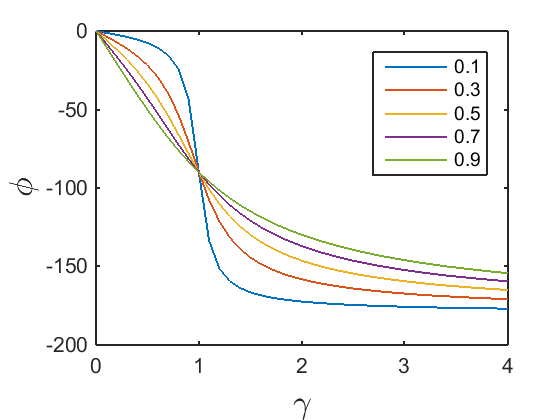

In [22]:
phi = [];
for i = 1:length(zeta)
    phi(i,:) = -atan2((2*zeta(i).*r),(1-r.^2));
end

plot(r,phi*180/pi)
xlabel('\gamma','fontsize',16)
ylabel('\phi','fontsize',16)
legend('0.1','0.3','0.5','0.7','0.9')

## 2.2. Resonance

- Input frequency near resonance frequency


- Resonance frequency is generally different from natural frequency, but they often are close enough

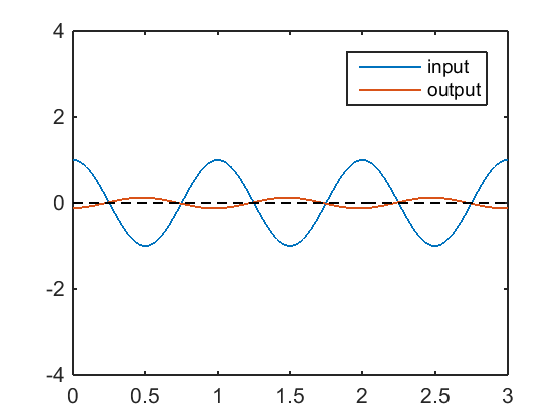

In [23]:
% in time domain
f = 1;
w = 2*pi*f;
F0 = 1;
k = 1;

zeta = 0.2;
r = 3;
M = 1./sqrt((1-r.^2).^2 + (2*zeta*r)^2); % ignore a constant of F0/k
phi = -atan2((2*zeta*r),(1-r^2));

t = 0:0.01:3;

x1 = F0*exp(1j*w*t);
x2 = F0/k*M*exp(1j*(w*t + phi));

plot(t,real(x1),t,real(x2),t,zeros(size(t)),'k--'), ylim([-4 4])
legend('input','output')

In [11]:
%%html
<iframe 
width="560" height="315" src="https://www.youtube.com/embed/pjzggPk8DO4?list=PLBD_gON7g_m06aIGNGB3BE_sV2rZdo8wX" frameborder="0" allowfullscreen>
</iframe>

In [12]:
%%html
<iframe 
width="560" height="315" src="https://www.youtube.com/embed/TYA8C85CdCc?list=PLBD_gON7g_m06aIGNGB3BE_sV2rZdo8wX" frameborder="0" allowfullscreen>
</iframe>

In [13]:
%%html
<iframe width="420" height="315" 
src="https://www.youtube.com/embed/Mqt_Amkw-0Y" frameborder="0" allowfullscreen>
</iframe>

In [14]:
%%html
<iframe width="420" height="315" 
src="https://www.youtube.com/embed/CzJ8EKi11pU" frameborder="0" allowfullscreen>
</iframe>

In [15]:
%%html
<iframe 
width="420" height="315" src="https://www.youtube.com/embed/lXyG68_caV4" frameborder="0" allowfullscreen>
</iframe>

In [16]:
%%html
<iframe 
width="420" height="315" src="https://www.youtube.com/embed/S9gr4w_U9Qs" frameborder="0" allowfullscreen>
</iframe>

In [25]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>